# Розрахунок теплового балансу киснево-конвертерної плавки

У цьому документі представлено розрахунок теплового балансу киснево-конвертерної плавки з теоретичним обґрунтуванням та програмною реалізацією.

## Вступ: Тепловий баланс киснево-конвертерної плавки як фундаментальний інструмент оптимізації виробництва сталі
Киснево-конвертерний процес виробництва сталі залишається домінуючою технологією у світовій металургійній галузі, забезпечуючи виплавку понад 70% усієї сталі. Ефективність цього процесу суттєво впливає на економічні показники металургійних підприємств та екологічний аспект виробництва. У цьому контексті розрахунок теплового балансу є одним із ключових інструментів підвищення ефективності конвертерної плавки.

Тепловий баланс дозволяє здійснювати точний контроль енергетичних потоків у ході металургійного процесу, що безпосередньо впливає на температурний режим плавки та, як наслідок, на якість отриманої сталі. Він є аналітичною основою для прийняття обґрунтованих технологічних рішень щодо оптимізації складу шихти, визначення необхідності коригуючих добавок та управління температурним режимом конвертера.

Сучасні виклики металургійної галузі, пов'язані з підвищенням енергоефективності, зниженням викидів CO₂ та інших забруднювачів, а також з економічною доцільністю використання вторинних ресурсів, актуалізують значення точного розрахунку теплового балансу. Цей розрахунок дозволяє знайти оптимальний баланс між використанням чавуну та металобрухту, що має безпосередній вплив як на економічні показники виробництва, так і на його екологічність.

Методологічно розрахунок теплового балансу базується на комплексному аналізі всіх джерел надходження та витрати тепла в процесі конвертерної плавки. У цьому дослідженні представлена математична модель та алгоритм розрахунку, що враховують фізичне тепло шихтових матеріалів, теплові ефекти хімічних реакцій окиснення елементів, тепло шлакоутворення, а також всі види теплових втрат конвертера.

Окрім технологічної цінності, точний розрахунок теплового балансу набуває особливого значення в контексті цифровізації металургійних процесів та розвитку систем автоматизованого керування. Інтеграція подібних розрахунків у системи моніторингу та керування процесом плавки є одним із елементів концепції "розумного виробництва" та важливим кроком у напрямку підвищення адаптивності технологічних процесів до змінних умов виробництва.

Таким чином, представлений розрахунок теплового балансу киснево-конвертерної плавки має не лише теоретичне, але й вагоме практичне значення для підвищення ефективності та сталості сучасного металургійного виробництва.

# Постановка задачі: Розрахунок теплового балансу киснево-конвертерної плавки

## Загальний опис та мета

Розрахунок теплового балансу киснево-конвертерної плавки є фундаментальним інструментом енергетичного аналізу металургійного процесу. Мета даного розрахунку полягає у визначенні кількісних характеристик енергетичних потоків під час плавки з метою прогнозування та контролю температури сталі, а також оптимізації використання матеріальних ресурсів.

Тепловий баланс дозволяє:
- Прогнозувати температуру сталі у кінці продувки
- Визначати оптимальне співвідношення між чавуном та металобрухтом
- Розраховувати необхідну кількість коригуючих добавок (охолоджувачів або палива)
- Аналізувати структуру енергетичних потоків для підвищення ефективності процесу

## Цілі розрахунку

1. Кількісно оцінити всі джерела надходження тепла в конвертер
2. Кількісно оцінити всі статті витрати тепла під час плавки
3. Визначити надлишок або дефіцит тепла
4. Розрахувати необхідну кількість коригуючих добавок для досягнення заданої температури сталі
5. Представити структуру теплового балансу у візуальному вигляді для аналізу

## Постановка задачі

Необхідно розробити математичну модель та програмну реалізацію для розрахунку теплового балансу киснево-конвертерної плавки, що включатиме:

1. Розрахунок статей надходження тепла:
   - Фізичне тепло рідкого чавуну
   - Тепло міксерного шлаку
   - Тепло окиснення домішок металошихти
   - Тепло окиснення заліза
   - Тепло шлакоутворення

2. Розрахунок статей витрати тепла:
   - Тепло, що виноситься рідкою сталлю
   - Тепло, що виноситься шлаком
   - Тепло, що виноситься конвертерними газами
   - Тепло, що витрачається на дисоціацію оксидів заліза шихти
   - Тепло, що витрачається на дисоціацію карбонату кальцію вапна
   - Тепло, що виноситься пилом
   - Тепло, що виноситься викидами металу, корольками металу в шлаку і виплесками
   - Теплові втрати конвертера

3. Визначення балансу тепла:
   - Розрахунок різниці між надходженням і витратою тепла
   - Оцінка необхідності коригуючих добавок

4. Розрахунок коригуючих добавок:
   - При надлишку тепла — розрахунок додаткової маси металобрухту
   - При дефіциті тепла — розрахунок необхідної маси палива різних видів

## Вихідні дані для розрахунку

Для виконання розрахунку необхідні наступні вихідні дані:

### Матеріальний баланс плавки:
- Маса рідкого чавуну (кг)
- Маса сталі (кг)
- Маса шлаку (кг)
- Маса металобрухту (кг)
- Маса міксерного шлаку (кг)
- Маса пилу (кг)
- Втрати заліза (кг)
- Маса вапна (кг)
- Маса футерівки (кг)

### Температурні параметри:
- Температура чавуну (°C)
- Температура сталі (°C)
- Температура шлаку (°C)

### Хімічний склад матеріалів:
- Хімічний склад чавуну (%, C, Si, Mn, P, S)
- Хімічний склад сталі (%, C, Si, Mn, P, S)
- Хімічний склад шлаку (%, FeO, Fe₂O₃, SiO₂, P₂O₅)
- Хімічний склад додаткових матеріалів (вапно, футерівка, окатиші)

### Коефіцієнти та константи:
- Теплові ефекти реакцій окиснення елементів
- Коефіцієнти для розрахунку теплоємності газів
- Теплота дисоціації карбонату кальцію
- Теплові ефекти при введенні палива

## Очікувані результати

Результатом розрахунку мають бути:

1. Кількісні значення по всіх статтях надходження тепла (кДж та %)
2. Кількісні значення по всіх статтях витрати тепла (кДж та %)
3. Загальний баланс тепла із визначенням надлишку або дефіциту (кДж та % від надходження)
4. Розрахована кількість коригуючих добавок (кг)
5. Візуальне представлення структури теплового балансу

Отримані результати дозволять оптимізувати процес плавки, забезпечити задану температуру сталі та підвищити енергоефективність виробництва.

![Діаграма](process.svg "Діаграма")

# Використані довідкові дані для розрахунку теплового балансу

У цьому документі наведено таблиці та довідкові дані, які використовуються у розрахунку теплового балансу киснево-конвертерної плавки.

## Теплові ефекти реакцій окиснення елементів киснем газової фази

| Реакція* | ккал/кг реагенту, що окислюється | ккал/кг продукту, що утворюється |
| :--- | :---: | :---: |
| $[\text{C}] + \{\text{O}_2\} = \{\text{CO}_2\}$ | 7236 | 1973 |
| $[\text{Si}] + \{\text{O}_2\} = \{\text{SiO}_2\}$ | 6075 | 2835 |
| $2[\text{P}] + 5/2\{\text{O}_2\} = \{\text{P}_2\text{O}_5\}$ | 3621 | 1581 |
| $[\text{C}] + 1/2\{\text{O}_2\} = \{\text{CO}\}$ | 2220 | 951 |
| $2[\text{Cr}] + 3/2\{\text{O}_2\} = \{\text{Cr}_2\text{O}_3\}$ | 2208 | 1511 |
| $2[\text{Fe}] + 3/2\{\text{O}_2\} = \{\text{Fe}_2\text{O}_3\}$ | 1608 | 1125 |
| $[\text{Mn}] + 1/2\{\text{O}_2\} = \{\text{MnO}\}$ | 1390 | 1077 |
| $[\text{Fe}] + 1/2\{\text{O}_2\} = \{\text{FeO}\}$ | 920 | 715 |
| $2\{\text{FeO}\} + 1/2\{\text{O}_2\} = \{\text{Fe}_2\text{O}_3\}$ | 482 | 482 |
\* Квадратними дужками позначено елементи, що знаходяться у розчині в металі, фігурними - газоподібні речовини та їх розчини в шлаку.

**Використання в розрахунку теплового балансу:**

Дані з цієї таблиці використовуються для визначення теплових ефектів реакцій окислення елементів. Ці значення перетворені у константи у коді програми (ккал/кг × 4.1868 = кДж/кг):
- C_TO_CO_HEAT = 11680 кДж/кг (окислення вуглецю до CO)
- C_TO_CO2_HEAT = 35300 кДж/кг (окислення вуглецю до CO₂)
- SI_HEAT = 26930 кДж/кг (окислення кремнію)
- MN_HEAT = 7035 кДж/кг (окислення марганцю)
- P_HEAT = 19755 кДж/кг (окислення фосфору)
- FEO_HEAT = 3600 кДж/кг (утворення FeO)
- FE2O3_HEAT = 5110 кДж/кг (утворення Fe₂O₃)

Ці константи використовуються у функціях Q_dom, Q_Fe, Q_okys_Fe для розрахунку теплових ефектів окислення домішок металошихти та заліза.

## Теплоємності деяких газів (Таблиця І.2)

Коефіцієнти для розрахунку теплоємності за формулою $c_p = a + bT + cT^{-2}$

| Газ   | a     | b·10³ | c·10⁻⁵ | ΔT, К      |
| :---- | :---- | :---- | :----- | :--------- |
| CO    | 6,79  | 0,98  | -0,11  | 298 ÷ 2500 |
| CO₂   | 10,55 | 2,16  | -2,04  | 298 ÷ 2500 |
| CH₄   | 5,65  | 11,44 | -0,46  | 298 ÷ 1500 |
| C₂H₄  |       |       |        |            |
| H₂    | 27,30 | 3,27  | 0,50   | 298 ÷ 3000 |
| H₂O   | 18,03 | -     | -      | 273 ÷ 373  |
| N₂    | 6,66  | 1,02  | -      | 298 ÷ 2500 |
| O₂    | 7,16  | 1,0   | -0,40  | 298 ÷ 3000 |

**Використання в розрахунку теплового балансу:**

Коефіцієнти з цієї таблиці безпосередньо використовуються у функції Q_g для розрахунку кількості тепла, що виноситься конвертерними газами (CO, CO₂, N₂, O₂). Значення коефіцієнтів a, b і c підставляються у формулу (5.70):

```python
gas_coefs = {
    'CO': {'a': 6.79, 'b': 0.98, 'c': -0.11},
    'CO2': {'a': 10.55, 'b': 2.16, 'c': -2.04},
    'N2': {'a': 6.66, 'b': 1.02, 'c': 0},
    'O2': {'a': 7.16, 'b': 1.0, 'c': -0.40}
}
```

При цьому b·10³ означає, що коефіцієнт b потрібно помножити на 10⁻³, а c·10⁻⁵ - що коефіцієнт c потрібно помножити на 10⁵.

## Фізико-хімічні властивості заліза, чавуну і сталі (Таблиця І.1)

| Показник                                   | Залізо            | Чавун      | Сталь      |
| :----------------------------------------- | :---------------- | :------------: | :----------: |
| **Густина, т/м³** |                   |                |              |
|   • рідкого                                | 6,9...7,2         | 6,7          | 7,0...7,2    |
|   • твердого                               | 7,88              | 7,2          | 7,8...7,9    |
| **В'язкість (1600 °С)** |                   |                |              |
|   • динамічної, Па·с                      | 0,0047...0,0050  | 0,0025       | 0,006...0,007 |
|   • кінематична · 10⁷, м²/с               | 6,5...7,2         | 3,7          | 8,3...10     |
| **Поверхневий натяг, Дж/м²** | 1,6...1,8         | 0,004...0,008  | 1,2...1,87   |
| **Температура, °С** |                   |                |              |
|   • плавлення                             | 1536...1539       | 1147...1500    | 1150...1600  |
|   • кипіння                                | 3227...3230       | н/д          | н/д          |
| **Теплота, кДж/кг** |                   |                |              |
|   • плавлення                             | 270               | 231          | 272          |
|   • кипіння                                | 6280              | н/д          | н/д          |
| **Питома теплоємність, Дж/(кг·К)** |                   |                |              |
|   • рідкого                                | 749               | 790          | 790          |
|   • твердого                               | формула (4.38)    | 620          | 600...720    |
| **Коефіцієнт теплопровідності, Вт/(м·К)** |                   |                |              |
|   • рідкого (1600 °С)                      | 23                | 24,0         | 24...40      |
|   • твердого                               | 95                | 30,3         | 29,1         |

**Використання в розрахунку теплового балансу:**

З цієї таблиці в розрахунку теплового балансу використовуються дані про питому теплоємність рідкого чавуну та сталі для визначення теплових коефіцієнтів.

Ці значення враховані при визначенні коефіцієнтів для розрахунку фізичного тепла чавуну (CHAV_COEFFICIENT_1, CHAV_COEFFICIENT_2) та тепла, що виноситься рідкою сталлю (ST_COEFFICIENT_1, ST_COEFFICIENT_2).

## Початкові дані: склад чавуну (фрагмент Додатку Е)

| № з/п | C    | Si   | Mn   | P    | S    | Додатковий тип металобрухту | Вага, кг\* |
| :---- | :--- | :--- | :--- | :--- | :--- | :-------------------------- | :--------- |
| 1     | 4,32 | 0,83 | 1,00 | 0,17 | 0,05 | чушковий чавун              | 17,7       |
| 2     | 4,65 | 0,94 | 0,95 | 0,16 | 0,06 | скрап                       | 5,0        |
| 3     | 4,45 | 0,88 | 1,15 | 0,17 | 0,045| чушковий чавун              | 10,8       |
| 4     | 4,60 | 0,73 | 0,98 | 0,18 | 0,05 | кременистий лом            | 7,9        |
| 5     | 4,25 | 0,82 | 1,08 | 0,15 | 0,045| чушковий чавун              | 5,7        |
| 6     | 4,40 | 0,85 | 1,13 | 0,20 | 0,05 | кременистий лом            | 8,1        |
| 7     | 4,70 | 0,91 | 0,98 | 0,20 | 0,040| чушковий чавун              | 8,5        |
| 8     | 4,35 | 0,80 | 1,05 | 0,19 | 0,05 | скрап                       | 7,2        |
| 9     | 4,29 | 0,78 | 1,13 | 0,18 | 0,05 | кременистий лом            | 9,3        |
| 10    | 4,70 | 0,83 | 0,73 | 0,12 | 0,05 | скрап                       | 9,5        |
| 11    | 4,25 | 0,35 | 1,08 | 0,15 | 0,045| окатиші                     | 1,8        |
| 12    | 4,40 | 0,30 | 1,13 | 0,20 | 0,05 | кременистий лом            | 7,7        |
| 13    | 4,70 | 0,32 | 0,98 | 0,2  | 0,04 | окатиші                     | 0,9        |
| 14    | 4,35 | 0,44 | 1,05 | 0,19 | 0,05 | окатиші                     | 1,3        |
| 15    | 4,29 | 0,41 | 1,13 | 0,18 | 0,05 | кременистий лом            | 9,6        |

\* Вага додаткового металобрухту вказана на 100 кг рідкого чавуну.

**Використання в розрахунку теплового балансу:**

Дані про склад чавуну та кількість металобрухту використовуються для формування масиву `variants`, який містить вхідні дані для різних варіантів розрахунку теплового балансу.

У коді масив variants поєднує дані з цієї таблиці та таблиці "Склад готової сталі" для створення набору вихідних даних для кожного варіанту розрахунку.

## Склад готової сталі (фрагмент Додатку Е)

| № з/п | C             | Si            | Mn            | P    | S    | Температура, °С |
| :---- | :------------ | :------------ | :------------ | :--- | :--- | :-------------- |
|       |               |               |               |      |      | чавуну | сталі |
| 1     | 0,38÷0,46    | 0,20÷0,30    | 0,58÷0,78    | 0,04 | 0,04 | 1350   | 1595  |
| 2     | 0,08÷0,16    | сліди         | 0,33÷0,53    | 0,05 | 0,04 | 1335   | 1630  |
| 3     | 0,15÷0,23    | 0,19÷0,29    | 0,44÷0,64    | 0,04 | 0,05 | 1380   | 1620  |
| 4     | 0,13÷0,21    | 0,18÷0,28    | 0,40÷0,60    | 0,05 | 0,05 | 1360   | 1620  |
| 5     | 0,30÷0,38    | 0,18÷0,28    | 0,48÷0,68    | 0,045| 0,04 | 1340   | 1590  |
| 6     | 0,14÷0,22    | 0,16÷0,26    | 0,36÷0,56    | 0,05 | 0,04 | 1390   | 1620  |
| 7     | 0,08÷0,16    | сліди         | 0,30÷0,50    | 0,05 | 0,04 | 1320   | 1620  |
| 8     | 0,20÷0,28    | 0,14÷0,24    | 0,46÷0,66    | 0,04 | 0,04 | 1370   | 1600  |
| 9     | 0,10÷0,18    | 0,18÷0,28    | 0,40÷0,60    | 0,05 | 0,05 | 1380   | 1620  |
| 10    | 0,25÷0,33    | 0,20÷0,30    | 0,60÷0,80    | 0,04 | 0,04 | 1380   | 1590  |
| 11    | 0,30÷0,38    | 0,18÷0,28    | 0,48÷0,68    | 0,045| 0,04 | 1300   | 1590  |
| 12    | 0,14÷0,22    | 0,16÷0,26    | 0,36÷0,56    | 0,05 | 0,04 | 1370   | 1610  |
| 13    | 0,08÷0,16    | сліди         | 0,30÷0,50    | 0,05 | 0,04 | 1350   | 1625  |
| 14    | 0,20÷0,28    | 0,14÷0,24    | 0,46÷0,66    | 0,04 | 0,04 | 1300   | 1600  |
| 15    | 0,10÷0,18    | 0,18÷0,28    | 0,40÷0,60    | 0,05 | 0,05 | 1380   | 1620  |

**Використання в розрахунку теплового балансу:**

З цієї таблиці використовуються дані про температуру чавуну і сталі, які є ключовими для розрахунку теплового балансу. Ці значення вносяться в масив `variants` як `t_чав` і `t_ст`.

Також з цієї таблиці використовується інформація про хімічний склад готової сталі для визначення кількості елементів, що окислюються під час процесу (зокрема, вміст вуглецю, марганцю та фосфору).

## Хімічний склад додаткового металобрухту (Таблиця 5.1)

| Матеріал             | C   | Si  | Mn  | P    | S     |
| :------------------- | :-- | :-- | :-- | :--- | :---- |
| Твердий чавун        | 3,9 | 0,8 | 0,6 | 0,1  | 0,045 |
| Кременистий брухт    | 0,2 | 7   | 0,5 | 0,04 | 0,05  |
| Скрап (металева склад) | 0,2 | 0   | 0,5 | 0,04 | 0,05  |

**Використання в розрахунку теплового балансу:**

Ця таблиця використовується для визначення хімічного складу додаткових матеріалів, що додаються до шихти. Це важливо для розрахунку матеріального балансу, а також для визначення кількості елементів, що беруть участь у окисненні і таким чином впливають на тепловий ефект.

Дані з цієї таблиці використовуються для правильного розрахунку кількості домішок у металошихті (C_metsh, Si_metsh, Mn_metsh, P_metsh), які потім використовуються у функції Q_dom для розрахунку тепла окислення домішок.

## Матеріальний баланс киснево-конвертерної плавки (Таблиця 5.10)

| №   | Матеріал                | Позначення          | кг      | №   | Матеріал          | Позначення   | кг      |
| :-- | :---------------------- | :------------------- | :------ | :-- | :---------------- | :------------ | :------ |
| **НАДІЙШЛО** |                       |                       |         | **ОТРИМАНО** |               |               |         |
| 1.  | Чавун рідкий            | $M_{чав}$           | 71,757  | 1.  | Рідкий метал      | $M_{ст}$      | 87,489  |
| 2.  | Звичайний брухт         | $M_{зб.бр}$         | 15,299  | 2.  | Шлак              | $M_{шл}$      | 15,952  |
| 3.  | Кременистий брухт      | $M_{кр.бр}$         | 1,000   | 3.  | Гази              | $M_г$         | 9,035   |
| 4.  | Твердий чавун           | $M_{тв.чав}$        | 2,300   | 4.  | Втрати Fe під час продувки | $\Delta Fe_{втр}$ | 4,5     |
| 5.  | Скрап                   | $(1 - \frac{b_{скр}}{100}) \cdot M_{скр}$ | 8,096   |     |                 |             |         |
| 6.  | Міксерний шлак          | $\frac{a}{100} \cdot M_{м.ш}$ | 1,292   |     |                 |             |         |
| 7.  | Заруднення звичайного брухту | $\frac{b_{зб.бр}}{100} \cdot M_{зб.бр}$ | 0,076   |     |                 |             |         |
| 8.  | Окалина звичайного брухту | $\frac{c}{100} \cdot M_{зб.бр}$ | 0,153   |     |                 |             |         |
| 9.  | Заруднення скрапу       | $\frac{b_{скр}}{100} \cdot M_{скр}$ | 1,104   |     |                 |             |         |
| 10. | Окатиші                 | $M_{окат}$          | 0,100   |     |                 |             |         |
| 11. | Плавиковий шпат         | $M_{пл.шп}$         | 0,150   |     |                 |             |         |
| 12. | Вапно                   | $M_{вап}$           | 8,669   |     |                 |             |         |
| 13. | Футерівка               | $M_{фут}$           | 0,134   |     |                 |             |         |
| 14. | Дуття                   | $M_{дут}$           | 6,769   |     |                 |             |         |
|     | **Всього:** |                       | **116,898** |     | **Всього:** |               | **116,976** |

**Використання в розрахунку теплового балансу:**

Ця таблиця дає приклад матеріального балансу, який використовується як еталон для перевірки правильності розрахунків. Дані з таблиці допомагають визначити співвідношення між масами різних компонентів шихти та продуктів плавки.

У коді розрахунку теплового балансу матеріальний баланс перевіряється порівнянням загальної маси вхідних матеріалів і маси продуктів. Різниця між цими величинами повинна бути мінімальною, що свідчить про правильність розрахунків.

## Кількість тепла, що засвоюється ванною при введенні палива (Таблиця 5.16)

| Карбід кремнію | Карбід кальцію | Антрацит | Піролізована біомаса |
| :------------: | :------------: | :------: | :-------------------: |
|     17000      |     10680      |  32000   |        21500        |

**Використання в розрахунку теплового балансу:**

Ця таблиця використовується для розрахунку кількості палива, необхідного для усунення дефіциту тепла. Значення з таблиці прямо використовуються у формулі (5.81) для визначення маси необхідного палива:

$$\Delta M_{пал} = \frac{\Delta Q}{Q_{пал}}, \text{ кг}$$

У коді ці значення зберігаються у константах:
- SIC_HEAT = 17000 (Карбід кремнію)
- CAC2_HEAT = 10680 (Карбід кальцію)
- COAL_HEAT = 32000 (Антрацит)
- BIOMASS_HEAT = 21500 (Піролізована біомаса)

Ці константи використовуються в умові if/else при розрахунку дефіциту тепла для визначення необхідної кількості різних видів палива.

## Константи для розрахунків

Для розрахунку теплового балансу необхідні різні константи, які описують теплові ефекти реакцій, теплоємність матеріалів тощо.

# Таблиця варіантів

| № | M_чав | M_ст | M_шл | M_м.бр | M_м.ш | M_пил | Fe_vtr | t_чав | t_ст |
|:-:|:-----:|:----:|:----:|:------:|:-----:|:-----:|:------:|:-----:|:----:|
| 1 | 71.8 | 87.5 | 16.0 | 17.7 | 1.3 | 0.9 | 4.5 | 1350 | 1595 |
| 2 | 70.0 | 85.0 | 15.0 | 5.0 | 1.2 | 0.85 | 4.2 | 1335 | 1630 |
| 3 | 72.0 | 88.0 | 16.5 | 10.8 | 1.3 | 0.92 | 4.6 | 1380 | 1620 |
| 4 | 71.0 | 86.5 | 15.8 | 7.9 | 1.2 | 0.87 | 4.3 | 1360 | 1620 |
| 5 | 70.5 | 85.8 | 15.5 | 5.7 | 1.2 | 0.85 | 4.2 | 1340 | 1590 |
| 6 | 72.2 | 88.2 | 16.6 | 8.1 | 1.3 | 0.93 | 4.7 | 1390 | 1620 |
| 7 | 70.8 | 86.2 | 15.7 | 8.5 | 1.2 | 0.86 | 4.3 | 1320 | 1620 |
| 8 | 71.5 | 87.0 | 15.9 | 7.2 | 1.2 | 0.88 | 4.4 | 1370 | 1600 |
| 9 | 71.2 | 86.7 | 15.8 | 9.3 | 1.2 | 0.87 | 4.3 | 1380 | 1620 |
| 10 | 70.9 | 86.3 | 15.6 | 9.5 | 1.2 | 0.86 | 4.3 | 1380 | 1590 |
| 11 | 70.0 | 85.0 | 15.0 | 1.8 | 1.2 | 0.85 | 4.2 | 1300 | 1590 |
| 12 | 71.7 | 87.7 | 16.1 | 7.7 | 1.3 | 0.91 | 4.6 | 1370 | 1610 |
| 13 | 70.2 | 85.2 | 15.1 | 0.9 | 1.2 | 0.85 | 4.2 | 1350 | 1625 |
| 14 | 70.6 | 85.6 | 15.3 | 1.3 | 1.2 | 0.85 | 4.2 | 1300 | 1600 |
| 15 | 71.3 | 86.8 | 15.9 | 9.6 | 1.2 | 0.87 | 4.3 | 1380 | 1620 |

де:

- M_чав - маса чавуну, кг;
- M_ст - маса сталі, кг;
- M_шл - маса шлаку, кг;
- M_м.бр - маса металобрухту, кг;
- M_м.ш - маса міксерного шлаку, кг;
- M_пил - маса пилу, кг;
- Fe_vtr - втрати заліза, кг;
- t_чав - температура чавуну, °C;
- t_ст - температура сталі, °C.

# Константи для розрахунку теплового балансу

## Коефіцієнти для розрахунку фізичного тепла чавуну
| Константа | Значення | Опис | Одиниці виміру |
|:----------|:--------:|:-----|:---------------|
| CHAV_COEFFICIENT_1 | 61.9 | Перший коефіцієнт рівняння | кДж/кг |
| CHAV_COEFFICIENT_2 | 0.88 | Температурний коефіцієнт | кДж/(кг·°C) |

## Коефіцієнти для розрахунку тепла міксерного шлаку
| Константа | Значення | Опис | Одиниці виміру |
|:----------|:--------:|:-----|:---------------|
| PERCENT_DIVISOR | 100 | Дільник для переведення відсотків у частки | - |
| MSH_COEFFICIENT_1 | 1.53 | Температурний коефіцієнт | кДж/(кг·°C) |
| MSH_OFFSET | 710 | Тепловий зсув | кДж/кг |

## Коефіцієнти для розрахунку тепла окислення домішок
| Константа | Значення | Опис | Одиниці виміру |
|:----------|:--------:|:-----|:---------------|
| C_TO_CO_HEAT | 11680 | Тепловий ефект окислення вуглецю до CO | кДж/кг |
| C_TO_CO2_HEAT | 35300 | Тепловий ефект окислення вуглецю до CO₂ | кДж/кг |
| SI_HEAT | 26930 | Тепловий ефект окислення кремнію | кДж/кг |
| MN_HEAT | 7035 | Тепловий ефект окислення марганцю | кДж/кг |
| P_HEAT | 19755 | Тепловий ефект окислення фосфору | кДж/кг |

## Коефіцієнти для розрахунку тепла окислення заліза та шлакоутворення
| Константа | Значення | Опис | Одиниці виміру |
|:----------|:--------:|:-----|:---------------|
| FEO_HEAT | 3600 | Тепловий ефект утворення FeO | кДж/кг |
| FE2O3_HEAT | 5110 | Тепловий ефект утворення Fe₂O₃ | кДж/кг |
| SIO2_HEAT | 2300 | Тепловий ефект утворення SiO₂ у шлаку | кДж/кг |
| P2O5_HEAT | 4886 | Тепловий ефект утворення P₂O₅ у шлаку | кДж/кг |

## Коефіцієнти для розрахунку тепла рідкої сталі та шлаку
| Константа | Значення | Опис | Одиниці виміру |
|:----------|:--------:|:-----|:---------------|
| ST_COEFFICIENT_1 | 54.8 | Перший коефіцієнт рівняння | кДж/кг |
| ST_COEFFICIENT_2 | 0.84 | Температурний коефіцієнт | кДж/(кг·°C) |
| SHL_COEFFICIENT | 2.09 | Температурний коефіцієнт | кДж/(кг·°C) |
| SHL_OFFSET | 1380 | Тепловий зсув | кДж/кг |

## Коефіцієнти для розрахунку тепла пилу та викидів
| Константа | Значення | Опис | Одиниці виміру |
|:----------|:--------:|:-----|:---------------|
| PIL_COEFFICIENT_1 | 23.05 | Перший коефіцієнт рівняння | кДж/кг |
| PIL_COEFFICIENT_2 | 0.69 | Температурний коефіцієнт | кДж/(кг·°C) |
| AVERAGE_DIVISOR | 2 | Дільник для розрахунку середньої температури | - |
| VKV_COEFFICIENT_1 | 54.9 | Перший коефіцієнт рівняння | кДж/кг |
| VKV_COEFFICIENT_2 | 0.838 | Температурний коефіцієнт | кДж/(кг·°C) |

## Коефіцієнти для розрахунку теплових втрат та конвертерних газів
| Константа | Значення | Опис | Одиниці виміру |
|:----------|:--------:|:-----|:---------------|
| VTR_PERCENT | 5 | Відсоток теплових втрат від загального надходження тепла | % |
| MOLAR_VOLUME | 22.4 | Мольний об'єм газу при нормальних умовах | л/моль |
| CAL_TO_J | 41868 | Коефіцієнт переведення калорій в джоулі | Дж/ккал |
| CACO3_HEAT | 4040 | Теплота дисоціації карбонату кальцію | кДж/кг |
| PERCENT_TO_FRACTION | 0.01 | Коефіцієнт для переведення % в частки | - |

## Теплові ефекти палива
| Паливо | Значення | Одиниці виміру |
|:----------|:--------:|:---------------|
| Карбід кремнію (SIC_HEAT) | 17000 | кДж/кг |
| Карбід кальцію (CAC2_HEAT) | 10680 | кДж/кг |
| Антрацит (COAL_HEAT) | 32000 | кДж/кг |
| Піролізована біомаса (BIOMASS_HEAT) | 21500 | кДж/кг |

## Додаткові матеріальні константи
| Константа | Значення | Опис | Одиниці виміру |
|:----------|:--------:|:-----|:---------------|
| FEO_MSH | 0.8 | % FeO в міксерному шлаку | % |
| FEO_OK | 0.5 | % FeO в окатишах | % |
| FE2O3_FUT | 1.0 | % Fe₂O₃ у футерівці | % |
| FE2O3_OK | 0.3 | % Fe₂O₃ в окатишах | % |
| CO2_VAP | 5 | % CO₂ у вапні | % |
| M_OKAT | 0.1 | Маса окатишів | кг |
| M_FUT | 0.13 | Маса футерівки | кг |
| T_SHL | 1600 | Температура шлаку | °C |
| FEO | 10 | Вміст оксиду заліза FeO | % |
| FE2O3 | 1 | Вміст оксиду заліза Fe₂O₃ | % |
| SIO2 | 10 | Вміст діоксиду кремнію | % |
| P2O5 | 1 | Вміст пентаоксиду фосфору | % |
| ALPHA | 0.1 | Коефіцієнт alpha | - |
| A_COEF | 100 | Коефіцієнт a (частка міксерного шлаку) | % |
| C_COEF | 100 | Коефіцієнт c (частка окатишів) | % |

In [7]:
# ================= КОНСТАНТИ =================

# Коефіцієнти для розрахунку фізичного тепла чавуну (кДж/кг)
CHAV_COEFFICIENT_1 = 61.9  # Перший коефіцієнт рівняння
CHAV_COEFFICIENT_2 = 0.88  # Температурний коефіцієнт (кДж/кг·°C)

# Коефіцієнти для розрахунку тепла міксерного шлаку
PERCENT_DIVISOR = 100  # Дільник для переведення відсотків у частки
MSH_COEFFICIENT_1 = 1.53  # Температурний коефіцієнт (кДж/кг·°C)
MSH_OFFSET = 710  # Тепловий зсув (кДж/кг)

# Коефіцієнти для розрахунку тепла окислення домішок (кДж/кг)
C_TO_CO_HEAT = 11680  # Тепловий ефект окислення вуглецю до CO (кДж/кг)
C_TO_CO2_HEAT = 35300  # Тепловий ефект окислення вуглецю до CO2 (кДж/кг)
SI_HEAT = 26930  # Тепловий ефект окислення кремнію (кДж/кг)
MN_HEAT = 7035  # Тепловий ефект окислення марганцю (кДж/кг)
P_HEAT = 19755  # Тепловий ефект окислення фосфору (кДж/кг)

# Коефіцієнти для розрахунку тепла окислення заліза (кДж/кг)
FEO_HEAT = 3600  # Тепловий ефект утворення FeO (кДж/кг)
FE2O3_HEAT = 5110  # Тепловий ефект утворення Fe2O3 (кДж/кг)

# Коефіцієнти для розрахунку тепла шлакоутворення (кДж/кг)
SIO2_HEAT = 2300  # Тепловий ефект утворення SiO2 у шлаку (кДж/кг)
P2O5_HEAT = 4886  # Тепловий ефект утворення P2O5 у шлаку (кДж/кг)

# Коефіцієнти для розрахунку тепла рідкої сталі (кДж/кг)
ST_COEFFICIENT_1 = 54.8  # Перший коефіцієнт рівняння
ST_COEFFICIENT_2 = 0.84  # Температурний коефіцієнт (кДж/кг·°C)

# Коефіцієнти для розрахунку тепла шлаку (кДж/кг)
SHL_COEFFICIENT = 2.09  # Температурний коефіцієнт (кДж/кг·°C)
SHL_OFFSET = 1380  # Тепловий зсув (кДж/кг)

# Коефіцієнти для розрахунку тепла пилу (кДж/кг)
PIL_COEFFICIENT_1 = 23.05  # Перший коефіцієнт рівняння
PIL_COEFFICIENT_2 = 0.69  # Температурний коефіцієнт (кДж/кг·°C)
AVERAGE_DIVISOR = 2  # Дільник для розрахунку середньої температури

# Коефіцієнти для розрахунку тепла викидів, корольків та виплесків (кДж/кг)
VKV_COEFFICIENT_1 = 54.9  # Перший коефіцієнт рівняння
VKV_COEFFICIENT_2 = 0.838  # Температурний коефіцієнт (кДж/кг·°C)

# Коефіцієнти для розрахунку теплових втрат
VTR_PERCENT = 5  # Відсоток теплових втрат від загального надходження тепла

# Коефіцієнти для розрахунку тепла конвертерних газів
MOLAR_VOLUME = 22.4  # Мольний об'єм газу при нормальних умовах (л/моль)
CAL_TO_J = 41868  # Коефіцієнт переведення калорій в джоулі (Дж/ккал)

# Коефіцієнт для розрахунку тепла дисоціації карбонату кальцію (кДж/кг)
CACO3_HEAT = 4040  # Теплота дисоціації карбонату кальцію (кДж/кг)

# Коефіцієнти для переведення відсотків у фізичні величини
PERCENT_TO_FRACTION = 0.01  # Коефіцієнт для переведення % в частки (1/100)

# Теплові ефекти палива (кДж/кг)
SIC_HEAT = 17000  # Карбід кремнію
CAC2_HEAT = 10680  # Карбід кальцію
COAL_HEAT = 32000  # Антрацит
BIOMASS_HEAT = 21500  # Піролізована біомаса

# Додаткові матеріальні константи
FEO_MSH = 0.8  # % FeO в міксерному шлаку
FEO_OK = 0.5  # % FeO в окатишах
FE2O3_FUT = 1.0  # % Fe2O3 у футерівці
FE2O3_OK = 0.3  # % Fe2O3 в окатишах
CO2_VAP = 5  # % CO2 у вапні
M_OKAT = 0.1  # Маса окатишів
M_FUT = 0.13  # Маса футерівки
T_SHL = 1600  # Температура шлаку
FEO = 10  # Вміст оксиду заліза FeO
FE2O3 = 1  # Вміст оксиду заліза Fe₂O₃
SIO2 = 10  # Вміст діоксиду кремнію
P2O5 = 1  # Вміст пентаоксиду фосфору
ALPHA = 0.1  # Коефіцієнт alpha
A_COEF = 100  # Коефіцієнт a (частка міксерного шлаку)
C_COEF = 100  # Коефіцієнт c (частка окатишів)

# "Таблиця-варантів" (у вигляді списку словників)
variants = [
    {"M_чав": 71.8, "M_ст": 87.5, "M_шл": 16.0, "M_м.бр": 17.7, "M_м.ш": 1.3, "M_пил": 0.9, "Fe_vtr": 4.5, "t_чав": 1350, "t_ст": 1595},
    {"M_чав": 70.0, "M_ст": 85.0, "M_шл": 15.0, "M_м.бр": 5.0, "M_м.ш": 1.2, "M_пил": 0.85, "Fe_vtr": 4.2, "t_чав": 1335, "t_ст": 1630},
    {"M_чав": 72.0, "M_ст": 88.0, "M_шл": 16.5, "M_м.бр": 10.8, "M_м.ш": 1.3, "M_пил": 0.92, "Fe_vtr": 4.6, "t_чав": 1380, "t_ст": 1620},
    {"M_чав": 71.0, "M_ст": 86.5, "M_шл": 15.8, "M_м.бр": 7.9, "M_м.ш": 1.2, "M_пил": 0.87, "Fe_vtr": 4.3, "t_чав": 1360, "t_ст": 1620},
    {"M_чав": 70.5, "M_ст": 85.8, "M_шл": 15.5, "M_м.бр": 5.7, "M_м.ш": 1.2, "M_пил": 0.85, "Fe_vtr": 4.2, "t_чав": 1340, "t_ст": 1590},
    {"M_чав": 72.2, "M_ст": 88.2, "M_шл": 16.6, "M_м.бр": 8.1, "M_м.ш": 1.3, "M_пил": 0.93, "Fe_vtr": 4.7, "t_чав": 1390, "t_ст": 1620},
    {"M_чав": 70.8, "M_ст": 86.2, "M_шл": 15.7, "M_м.бр": 8.5, "M_м.ш": 1.2, "M_пил": 0.86, "Fe_vtr": 4.3, "t_чав": 1320, "t_ст": 1620},
    {"M_чав": 71.5, "M_ст": 87.0, "M_шл": 15.9, "M_м.бр": 7.2, "M_м.ш": 1.2, "M_пил": 0.88, "Fe_vtr": 4.4, "t_чав": 1370, "t_ст": 1600},
    {"M_чав": 71.2, "M_ст": 86.7, "M_шл": 15.8, "M_м.бр": 9.3, "M_м.ш": 1.2, "M_пил": 0.87, "Fe_vtr": 4.3, "t_чав": 1380, "t_ст": 1620},
    {"M_чав": 70.9, "M_ст": 86.3, "M_шл": 15.6, "M_м.бр": 9.5, "M_м.ш": 1.2, "M_пил": 0.86, "Fe_vtr": 4.3, "t_чав": 1380, "t_ст": 1590},
    {"M_чав": 70.0, "M_ст": 85.0, "M_шл": 15.0, "M_м.бр": 1.8, "M_м.ш": 1.2, "M_пил": 0.85, "Fe_vtr": 4.2, "t_чав": 1300, "t_ст": 1590},
    {"M_чав": 71.7, "M_ст": 87.7, "M_шл": 16.1, "M_м.бр": 7.7, "M_м.ш": 1.3, "M_пил": 0.91, "Fe_vtr": 4.6, "t_чав": 1370, "t_ст": 1610},
    {"M_чав": 70.2, "M_ст": 85.2, "M_шл": 15.1, "M_м.бр": 0.9, "M_м.ш": 1.2, "M_пил": 0.85, "Fe_vtr": 4.2, "t_чав": 1350, "t_ст": 1625},
    {"M_чав": 70.6, "M_ст": 85.6, "M_шл": 15.3, "M_м.бр": 1.3, "M_м.ш": 1.2, "M_пил": 0.85, "Fe_vtr": 4.2, "t_чав": 1300, "t_ст": 1600},
    {"M_чав": 71.3, "M_ст": 86.8, "M_шл": 15.9, "M_м.бр": 9.6, "M_м.ш": 1.2, "M_пил": 0.87, "Fe_vtr": 4.3, "t_чав": 1380, "t_ст": 1620},
]

Наведені вище константи відображають теплові ефекти реакцій та коефіцієнти, необхідні для розрахунку кількості тепла, що вноситься та витрачається під час киснево-конвертерної плавки.


## Розрахунок надходження тепла

Згідно з методикою розрахунку теплового балансу, надходження тепла складається з декількох компонентів.

### Фізичне тепло чавуну

Рідкий чавун вносить фізичне тепло, яке розраховується за формулою:

$$Q_{чав} = M_{чав} \cdot (61.9 + 0.88 \cdot t_{чав}), \text{ кДж}.$$

де:

- $Q_{чав}$ - кількість фізичного тепла, що вноситься рідким чавуном, кДж;
- $M_{чав}$ - маса чавуну, кг;
- $t_{чав}$ - температура чавуну, °C;
- $61.9$ - перший коефіцієнт рівняння, кДж/кг;
- $0.88$ - температурний коефіцієнт, кДж/(кг·°C).


In [8]:
def Q_chav(M_chav, t_chav):
    """
    Розрахунок фізичного тепла чавуну.

    Параметри:
    M_chav - маса чавуну, кг
    t_chav - температура чавуну, °C

    Повертає:
    Кількість тепла в кДж
    """
    return M_chav * (CHAV_COEFFICIENT_1 + CHAV_COEFFICIENT_2 * t_chav)

### Тепло міксерного шлаку

Міксерний шлак також вносить тепло, яке розраховується за формулою:

$$Q_{м.ш} = M_{м.ш} \cdot \frac{a}{100} \cdot (1.53 \cdot t_{м.ш} - 710), \text{ кДж}.$$

де:

- $Q_{м.ш}$ - кількість тепла, що вноситься міксерним шлаком, кДж;
- $M_{м.ш}$ - маса міксерного шлаку, кг;
- $a$ - частка міксерного шлаку, %;
- $t_{м.ш}$ - температура міксерного шлаку, °C;
- $1.53$ - температурний коефіцієнт, кДж/(кг·°C);
- $710$ - тепловий зсув, кДж/кг.

In [9]:
def Q_msh(M_msh, t_msh):
    """
    Розрахунок тепла міксерного шлаку.

    Параметри:
    M_msh - маса міксерного шлаку, кг
    t_msh - температура міксерного шлаку, °C

    Повертає:
    Кількість тепла в кДж
    """
    return M_msh * (A_COEF / PERCENT_DIVISOR) * (MSH_COEFFICIENT_1 * t_msh - MSH_OFFSET)

### Тепло окислення домішок металошихти

Важливе значення має тепло, що виділяється при окисленні домішок (C, Si, Mn, P) в металошихті:

$$Q_{дом} = [11680 \cdot (1 - \alpha) + 35300 \cdot \alpha] \cdot (C_{мет.ш} - 0.01 \cdot M_{ст} \cdot C_{пов}) +$$
$$+ 26930 \cdot Si_{мет.ш} + 7035 \cdot (Mn_{мет.ш} - 0.01 \cdot M_{ст} \cdot Mn_{пов}) +$$
$$+ 19755 \cdot (P_{мет.ш} - 0.01 \cdot M_{ст} \cdot P_{пов}), \text{ кДж}.$$

де:

- $Q_{дом}$ - кількість тепла окислення домішок металошихти, кДж;
- $\alpha$ - доля вуглецю, що окислюється до CO₂;
- $C_{мет.ш}$, $Si_{мет.ш}$, $Mn_{мет.ш}$, $P_{мет.ш}$ - маса відповідних елементів у металошихті, кг;
- $C_{пов}$, $Mn_{пов}$, $P_{пов}$ - вміст відповідних елементів у готовій сталі, %;
- $11680$ - тепловий ефект окислення вуглецю до CO, кДж/кг;
- $35300$ - тепловий ефект окислення вуглецю до CO₂, кДж/кг;
- $26930$ - тепловий ефект окислення кремнію, кДж/кг;
- $7035$ - тепловий ефект окислення марганцю, кДж/кг;
- $19755$ - тепловий ефект окислення фосфору, кДж/кг.

In [10]:
def Q_dom(C_metsh, M_st, C_pov, Si_metsh, Mn_metsh, Mn_pov, P_metsh, P_pov):
    """
    Розрахунок тепла окислення домішок металошихти.

    Параметри:
    C_metsh - маса вуглецю у металошихті, кг
    M_st - маса готової сталі, кг
    C_pov - вміст вуглецю у готовій сталі, %
    Si_metsh - маса кремнію у металошихті, кг
    Mn_metsh - маса марганцю у металошихті, кг
    Mn_pov - вміст марганцю у готовій сталі, %
    P_metsh - маса фосфору у металошихті, кг
    P_pov - вміст фосфору у готовій сталі, %

    Повертає:
    Кількість тепла в кДж
    """
    return (
        (C_TO_CO_HEAT * (1 - ALPHA) + C_TO_CO2_HEAT * ALPHA) * (C_metsh - PERCENT_TO_FRACTION * M_st * C_pov)
        + SI_HEAT * Si_metsh
        + MN_HEAT * (Mn_metsh - PERCENT_TO_FRACTION * M_st * Mn_pov)
        + P_HEAT * (P_metsh - PERCENT_TO_FRACTION * M_st * P_pov)
    )

### Тепло окислення заліза

Тепло, що виділяється при окисленні заліза, яке переходить в шлак і пил:

$$Q_{Fe} = 0.01 \cdot M_{шл} \cdot [3600 \cdot (FeO) + 5110 \cdot (Fe_2O_3) + 5110 \cdot \chi], \text{ кДж}.$$

де:

- $Q_{Fe}$ - кількість тепла окислення заліза, кДж;
- $M_{шл}$ - маса шлаку, кг;
- $(FeO)$, $(Fe_2O_3)$ - вміст відповідних оксидів заліза у шлаку, %;
- $\chi$ - маса пилу, кг;
- $3600$ - тепловий ефект утворення FeO, кДж/кг;
- $5110$ - тепловий ефект утворення Fe₂O₃, кДж/кг;
- $0.01$ - коефіцієнт для переведення відсотків у частки.

In [11]:
def Q_Fe(M_shl, chi):
    """
    Розрахунок тепла окислення заліза.

    Параметри:
    M_shl - маса шлаку, кг
    chi - маса пилу, кг

    Повертає:
    Кількість тепла в кДж
    """
    return PERCENT_TO_FRACTION * M_shl * (FEO_HEAT * FEO + FE2O3_HEAT * FE2O3 + FE2O3_HEAT * chi)

### Тепло шлакоутворення

Тепло, що виділяється при утворенні шлаку:

$$Q_{шл.утв} = 0.01 \cdot M_{шл} \cdot [2300 \cdot (SiO_2) + 4886 \cdot (P_2O_5)], \text{ кДж}.$$

де:

- $Q_{шл.утв}$ - кількість тепла шлакоутворення, кДж;
- $M_{шл}$ - маса шлаку, кг;
- $(SiO_2)$, $(P_2O_5)$ - вміст діоксиду кремнію та пентаоксиду фосфору у шлаку, %;
- $2300$ - тепловий ефект утворення SiO₂ у шлаку, кДж/кг;
- $4886$ - тепловий ефект утворення P₂O₅ у шлаку, кДж/кг;
- $0.01$ - коефіцієнт для переведення відсотків у частки.

In [12]:
def Q_shl_utv(M_shl):
    """
    Розрахунок тепла шлакоутворення.

    Параметри:
    M_shl - маса шлаку, кг

    Повертає:
    Кількість тепла в кДж
    """
    return PERCENT_TO_FRACTION * M_shl * (SIO2_HEAT * SIO2 + P2O5_HEAT * P2O5)

### Загальне надходження тепла

Загальна кількість тепла, що вноситься в конвертер, розраховується як сума всіх компонентів:

$$Q_{надх} = Q_{чав} + Q_{м.ш} + Q_{дом} + Q_{Fe} + Q_{шл.утв}, \text{ кДж}.$$

де:

- $Q_{надх}$ - загальна кількість тепла, що надходить в конвертер, кДж;
- $Q_{чав}$ - фізичне тепло чавуну, кДж;
- $Q_{м.ш}$ - тепло міксерного шлаку, кДж;
- $Q_{дом}$ - тепло окислення домішок металошихти, кДж;
- $Q_{Fe}$ - тепло окислення заліза, кДж;
- $Q_{шл.утв}$ - тепло шлакоутворення, кДж.

У програмному коді це реалізується як сума результатів відповідних функцій.

## Розрахунок витрати тепла

Після розрахунку надходження тепла необхідно розрахувати його витрату, яка складається з декількох компонентів.

### Тепло, що виноситься рідкою сталлю

Тепло, що виноситься рідкою сталлю, розраховується за формулою:

$$Q_{ст} = M_{ст} \cdot (54.8 + 0.84 \cdot t_{ст}), \text{ кДж}.$$

де:

- $Q_{ст}$ - кількість тепла, що виноситься рідкою сталлю, кДж;
- $M_{ст}$ - маса сталі, кг;
- $t_{ст}$ - температура сталі, °C;
- $54.8$ - перший коефіцієнт рівняння, кДж/кг;
- $0.84$ - температурний коефіцієнт, кДж/(кг·°C).

In [13]:
def Q_st(M_st, t_st):
    """
    Розрахунок тепла, що виноситься рідкою сталлю.

    Параметри:
    M_st - маса сталі, кг
    t_st - температура сталі, °C

    Повертає:
    Кількість тепла в кДж
    """
    return M_st * (ST_COEFFICIENT_1 + ST_COEFFICIENT_2 * t_st)

### Тепло, що виноситься шлаком

Тепло, що виноситься шлаком, розраховується за формулою:

$$Q_{шл} = M_{шл} \cdot (2.09 \cdot t_{шл} - 1380), \text{ кДж}.$$

де:

- $Q_{шл}$ - кількість тепла, що виноситься шлаком, кДж;
- $M_{шл}$ - маса шлаку, кг;
- $t_{шл}$ - температура шлаку, °C;
- $2.09$ - температурний коефіцієнт, кДж/(кг·°C);
- $1380$ - тепловий зсув, кДж/кг.


In [14]:
def Q_shl(M_shl):
    """
    Розрахунок тепла, що виноситься шлаком.

    Параметри:
    M_shl - маса шлаку, кг

    Повертає:
    Кількість тепла в кДж
    """
    return M_shl * (SHL_COEFFICIENT * T_SHL - SHL_OFFSET)

### Тепло, що виноситься конвертерними газами

Кількість тепла, що виносять конвертерні гази, розраховують з рівняння (4.5) спочатку окремо для кожного газу з урахуванням коефіцієнтів для розрахунку їх теплоємності, а потім знаходять їх суму:

$$Q_{г.і} = 41868 \cdot V_{г.і} \cdot \frac{a(T_{ст} - T_{чав}) + b(T_{ст}^2 - T_{чав}^2) - c(\frac{1}{T_{ст}} - \frac{1}{T_{чав}})}{22.4}, \text{ кДж}.$$

де:

- $Q_{г.і}$ - кількість тепла і-го газу, кДж;
- $V_{г.і}$ - об'єм і-го газу, м³;
- $T_{ст}$ - температура сталі в К (= t_{ст} + 273);
- $T_{чав}$ - температура чавуну в К (= t_{чав} + 273);
- $a, b, c$ - коефіцієнти для визначення теплоємності газів, кДж/(моль⋅К);
- $41868$ - коефіцієнт переведення калорій в джоулі, Дж/ккал;
- $22.4$ - мольний об'єм газу при нормальних умовах, л/моль.


In [15]:
def Q_g(V_gi, T_st, T_chav, coefs):
    """
    Розрахунок тепла конвертерних газів.

    Параметри:
    V_gi (dict) - об'єми газів (CO, CO2, N2...) в м³
    T_st - температура сталі в К (= t_st + 273)
    T_chav - температура чавуну в К (= t_chav + 273)
    coefs (dict) - коефіцієнти теплоємності газів з Таблиці І.2

    Повертає:
    Сумарне тепло конвертерних газів в кДж
    """
    Q_gi_sum = 0
    for gas in V_gi:
        a = coefs[gas]['a']
        # Правильно обробляємо коефіцієнт b·10³ (множимо на 10⁻³)
        b = coefs[gas]['b'] * 1e-3
        # Правильно обробляємо коефіцієнт c·10⁻⁵ (множимо на 10⁵)
        c = coefs[gas]['c'] * 1e5 if coefs[gas]['c'] != 0 else 0

        # Використовуємо формулу (5.70) з методики
        heat = CAL_TO_J * V_gi[gas] * (
                a * (T_st - T_chav) +
                b * (T_st ** 2 - T_chav ** 2) -
                c * (1 / T_st - 1 / T_chav)
        ) / MOLAR_VOLUME

        Q_gi_sum += heat

    # Переводимо результат в кДж
    return Q_gi_sum / 1000

### Тепло, що витрачається на дисоціацію оксидів заліза шихти

Частина тепла витрачається на дисоціацію оксидів заліза, які присутні в шихті:

$$Q_{окис}^{Fe} = 3600 \cdot 0.01 \cdot \left(\frac{a}{100} \cdot M_{чав} \cdot FeO_{м.ш} + \frac{c}{100} \cdot M_{м.бр} \cdot FeO_{ок}\right) + $$

$$+ 5110 \cdot 0.01 \cdot \left(M_{фут} \cdot Fe_{2}O_{3фут} + \frac{c}{100} \cdot M_{м.бр} \cdot Fe_{2}O_{3ок}\right), \text{ кДж}.$$

де:

- $Q_{окис}^{Fe}$ - кількість тепла дисоціації оксидів заліза шихти, кДж;
- $M_{чав}$ - маса чавуну, кг;
- $M_{м.бр}$ - маса металобрухту, кг;
- $M_{фут}$ - маса футерівки, кг;
- $a$ - частка міксерного шлаку, %;
- $c$ - частка окатишів, %;
- $FeO_{м.ш}$ - вміст FeO в міксерному шлаку, %;
- $FeO_{ок}$ - вміст FeO в окатишах, %;
- $Fe_{2}O_{3фут}$ - вміст Fe₂O₃ у футерівці, %;
- $Fe_{2}O_{3ок}$ - вміст Fe₂O₃ в окатишах, %;
- $3600$ - тепловий ефект утворення FeO, кДж/кг;
- $5110$ - тепловий ефект утворення Fe₂O₃, кДж/кг;
- $0.01$ - коефіцієнт для переведення відсотків у частки.


In [16]:
def Q_okys_Fe(M_chav, M_mbr):
    """
    Розрахунок тепла дисоціації оксидів заліза шихти.

    Параметри:
    M_chav - маса чавуну, кг
    M_mbr - маса металобрухту, кг

    Повертає:
    Тепло дисоціації оксидів заліза в кДж
    """
    # Працюємо безпосередньо з відсотками у формі від 0 до 100
    a_fraction = A_COEF / 100  # 100% -> 1.0
    c_fraction = C_COEF / 100  # 100% -> 1.0

    term1 = 3600 * 0.01 * (a_fraction * M_chav * FEO_MSH + c_fraction * M_mbr * FEO_OK)
    term2 = 5110 * 0.01 * (M_FUT * FE2O3_FUT + c_fraction * M_mbr * FE2O3_OK)

    return term1 + term2

### Тепло, що витрачається на дисоціацію карбонату кальцію вапна

Карбонат кальцію, який міститься у вапні, також потребує тепла для дисоціації:

$$Q_{окис}^{CaCO_3} = 4040 \cdot 0.01 \cdot M_{вап} \cdot CO_{2_{вап}}, \text{ кДж}.$$


де:

- $Q_{окис}^{CaCO_3}$ - кількість тепла дисоціації карбонату кальцію вапна, кДж;
- $M_{вап}$ - маса вапна, кг;
- $CO_{2_{вап}}$ - вміст CO₂ у вапні, %;
- $4040$ - теплота дисоціації карбонату кальцію, кДж/кг;
- $0.01$ - коефіцієнт для переведення відсотків у частки.

In [17]:
def Q_okys_CaCO3(M_vap):
    """
    Розрахунок тепла дисоціації карбонату кальцію вапна.

    Параметри:
    M_vap - маса вапна, кг

    Повертає:
    Тепло дисоціації карбонату кальцію в кДж
    """
    return CACO3_HEAT * PERCENT_TO_FRACTION * M_vap * CO2_VAP

### Тепло, що виноситься пилом

Тепло, що виноситься пилом, розраховується за формулою:

$$Q_{пил} = \chi \cdot (23.05 + 0.69 \cdot \frac{t_{чав} + t_{ст}}{2}), \text{ кДж}.$$

де:

- $Q_{пил}$ - кількість тепла, що виноситься пилом, кДж;
- $\chi$ - маса пилу, кг;
- $t_{чав}$ - температура чавуну, °C;
- $t_{ст}$ - температура сталі, °C;
- $23.05$ - перший коефіцієнт рівняння, кДж/кг;
- $0.69$ - температурний коефіцієнт, кДж/(кг·°C);

In [18]:
def Q_pil(chi, t_chav, t_st):
    """
    Розрахунок тепла, що виноситься пилом.

    Параметри:
    chi - маса пилу, кг
    t_chav - температура чавуну, °C
    t_st - температура сталі, °C

    Повертає:
    Кількість тепла в кДж
    """
    return chi * (PIL_COEFFICIENT_1 + PIL_COEFFICIENT_2 * (t_chav + t_st) / AVERAGE_DIVISOR)

### Тепло, що виноситься викидами металу, корольками металу в шлаку і виплесками

Тепло, що виноситься викидами, корольками та виплесками металу, розраховується за формулою:

$$Q_{в.к.в} = (\Delta Fe_{втр} - \chi) \cdot (54.9 + 0.838 \cdot t_{ст}), \text{ кДж}.$$

де:

- $Q_{в.к.в}$ - кількість тепла, що виноситься викидами, корольками та виплесками, кДж;
- $\Delta Fe_{втр}$ - загальні втрати заліза, кг;
- $\chi$ - маса пилу, кг;
- $t_{ст}$ - температура сталі, °C;
- $54.9$ - перший коефіцієнт рівняння, кДж/кг;
- $0.838$ - температурний коефіцієнт, кДж/(кг·°C).

In [19]:
def Q_vkv(Delta_Fe_vtr, chi, t_st):
    """
    Розрахунок тепла, що виноситься викидами, корольками та виплесками.

    Параметри:
    Delta_Fe_vtr - загальні втрати заліза, кг
    chi - маса пилу, кг
    t_st - температура сталі, °C

    Повертає:
    Кількість тепла в кДж
    """
    return (Delta_Fe_vtr - chi) * (VKV_COEFFICIENT_1 + VKV_COEFFICIENT_2 * t_st)

### Теплові втрати конвертера

Величина загальних теплових втрат конвертера становить в залежності від його садки 1,5...12 % від загального надходження тепла на процес. У нашому випадку, коли розрахунок здійснюється на 100 кг металошихти, величинами теплових втрат прийнято 5%.

$$Q_{втр} = 0.01 \cdot Q_{надх} \cdot 5\%, \text{ кДж},$$

де:

- $Q_{втр}$ - теплові втрати конвертера, кДж;
- $Q_{надх}$ - загальне надходження тепла, кДж;
- $0.01$ - коефіцієнт для переведення відсотків у частки;
- $5\%$ - прийнятий відсоток теплових втрат від загального надходження тепла.

In [20]:
def Q_vtr(Q_nadh):
    """
    Розрахунок теплових втрат конвертера.

    Параметри:
    Q_nadh - загальне надходження тепла, кДж

    Повертає:
    Кількість тепла теплових втрат в кДж
    """
    return PERCENT_TO_FRACTION * Q_nadh * VTR_PERCENT

### Загальна витрата тепла

Загальна кількість тепла, що витрачається в конвертері, розраховується як сума всіх компонентів:

$$Q_{витр} = Q_{ст} + Q_{шл} + Q_{г} + Q_{окис}^{Fe} + Q_{окис}^{CaCO_3} + Q_{пил} + Q_{в.к.в} + Q_{втр}, \text{ кДж}.$$

де:

- $Q_{витр}$ - загальна кількість тепла, що витрачається в конвертері, кДж;
- $Q_{ст}$ - тепло, що виноситься рідкою сталлю, кДж;
- $Q_{шл}$ - тепло, що виноситься шлаком, кДж;
- $Q_{г}$ - тепло, що виноситься конвертерними газами, кДж;
- $Q_{окис}^{Fe}$ - тепло, що витрачається на дисоціацію оксидів заліза шихти, кДж;
- $Q_{окис}^{CaCO_3}$ - тепло, що витрачається на дисоціацію карбонату кальцію вапна, кДж;
- $Q_{пил}$ - тепло, що виноситься пилом, кДж;
- $Q_{в.к.в}$ - тепло, що виноситься викидами, корольками та виплесками, кДж;
- $Q_{втр}$ - теплові втрати конвертера, кДж.

## Розрахунок коригуючих добавок

Коригуючі операції здійснюють, якщо різниця між надходженням і витратою тепла перевищує 0,5...0,8 %, що відповідає відхиленню фізичної температури сталі від середньозаданої на ± 10...15 °С.

Надлишок тепла $\Delta Q$ складає:

$$\Delta Q = Q_{надх} - Q_{витр}, \text{ кДж},$$

де:

- $\Delta Q$ - надлишок або дефіцит тепла, кДж;
- $Q_{надх}$ - загальне надходження тепла, кДж;
- $Q_{витр}$ - загальна витрата тепла, кДж.

або

$$\Delta Q' = \frac{\Delta Q}{Q_{надх}} \cdot 100\%, \text{ % від надходження тепла}.$$

де:

- $\Delta Q'$ - надлишок або дефіцит тепла у відсотках від надходження, %;
- $\Delta Q$ - надлишок або дефіцит тепла, кДж;
- $Q_{надх}$ - загальне надходження тепла, кДж.

Для усунення надлишку тепла на процес розраховують додаткову масу металобрухту:

$$\Delta M_{м.бр} = \frac{\Delta Q}{0.84 \cdot t_{ст} + 54.9}, \text{ кг},$$

де:

- $\Delta M_{м.бр}$ - додаткова маса металобрухту для усунення надлишку тепла, кг;
- $\Delta Q$ - надлишок тепла, кДж;
- $t_{ст}$ - температура сталі, °C;
- $0.84$ - температурний коефіцієнт, кДж/(кг·°C);
- $54.9$ - перший коефіцієнт рівняння, кДж/кг.

а для усунення дефіциту можливе використання одного або декількох видів палива:

$$\Delta M_{пал} = \frac{\Delta Q}{Q_{пал}}, \text{ кг},$$

де:

- $\Delta M_{пал}$ - маса палива для усунення дефіциту тепла, кг;
- $\Delta Q$ - абсолютна величина дефіциту тепла, кДж;
- $Q_{пал}$ - кількість тепла, що засвоюється ванною при введенні палива, кДж/кг.

**Таблиця 5.16. Кількість тепла, що засвоюється ванною при введенні палива, кДж/кг**

| Карбід кремнію | Карбід кальцію | Антрацит | Піролізована біомаса |
| :------------: | :------------: | :------: | :-------------------: |
|     17000      |     10680      |  32000   |        21500        |

# РОЗРАХУНОК

## Вибір варіанту

In [21]:
print("Розрахунок теплового балансу конвертерної плавки")
n = int(input("Введіть номер варіанту (1-15): "))
v = variants[n - 1]

Розрахунок теплового балансу конвертерної плавки


## Додаткові данні для розрахунку

In [22]:
# Для прикладу: склад чавуну (можна розширити для кожного варіанту)
C_metsh = 4.3
Si_metsh = 0.4
Mn_metsh = 1.1
P_metsh = 0.18
C_pov = 0.2
Mn_pov = 0.2
P_pov = 0.02

# Об'єми газів
V_gi = {
    'CO': 0.85,  # м³
    'CO2': 0.11,  # м³
    'N2': 0.02,  # м³
    'O2': 0.02   # м³
}

# Коефіцієнти теплоємності газів з Таблиці І.2
gas_coefs = {
    'CO': {'a': 6.79, 'b': 0.98, 'c': -0.11},
    'CO2': {'a': 10.55, 'b': 2.16, 'c': -2.04},
    'N2': {'a': 6.66, 'b': 1.02, 'c': 0},
    'O2': {'a': 7.16, 'b': 1.0, 'c': -0.40}
}

## Розрахунок надходження тепла

In [23]:
Q_chav_val = Q_chav(v["M_чав"], v["t_чав"])

In [24]:
Q_msh_val = Q_msh(v["M_м.ш"], v["t_чав"])

In [25]:
Q_dom_val = Q_dom(C_metsh, v["M_ст"], C_pov, Si_metsh, Mn_metsh, Mn_pov, P_metsh, P_pov)

In [26]:
Q_Fe_val = Q_Fe(v["M_шл"], v["M_пил"])

In [27]:
Q_shl_utv_val = Q_shl_utv(v["M_шл"])

In [28]:
Q_nadh = Q_chav_val + Q_msh_val + Q_dom_val + Q_Fe_val + Q_shl_utv_val

## Розрахунок витрати тепла

In [29]:
Q_st_val = Q_st(v["M_ст"], v["t_ст"])

In [30]:
Q_shl_val = Q_shl(v["M_шл"])

In [31]:
Q_pil_val = Q_pil(v["M_пил"], v["t_чав"], v["t_ст"])

In [32]:
Q_vkv_val = Q_vkv(v["Fe_vtr"], v["M_пил"], v["t_ст"])

In [33]:
Q_vtr_val = Q_vtr(Q_nadh)

In [34]:
T_st = v["t_ст"] + 273  # Температура в К
T_chav = v["t_чав"] + 273  # Температура в К

Q_g_val = Q_g(V_gi, T_st, T_chav, gas_coefs)

In [35]:
Q_okys_Fe_val = Q_okys_Fe(v["M_чав"], v["M_м.бр"])

In [36]:
# Маса вапна (припустимо, 5% від маси шлаку)
M_vap = 0.05 * v["M_шл"]
Q_okys_CaCO3_val = Q_okys_CaCO3(M_vap)

In [37]:
Q_vytr = Q_st_val + Q_shl_val + Q_g_val + Q_okys_Fe_val + Q_okys_CaCO3_val + Q_pil_val + Q_vkv_val + Q_vtr_val

## Розрахунок надлишку/дефіциту тепла

In [38]:
delta_Q = Q_nadh - Q_vytr

In [39]:
delta_Q_percent = delta_Q / Q_nadh * 100

## Виведення результатів

In [40]:
print("\n-- НАДХОДЖЕННЯ ТЕПЛА --")
print(f"Q_чав = {Q_chav_val:.2f} кДж ({Q_chav_val / Q_nadh * 100:.1f}%)")
print(f"Q_дом = {Q_dom_val:.2f} кДж ({Q_dom_val / Q_nadh * 100:.1f}%)")
print(f"Q_Fe = {Q_Fe_val:.2f} кДж ({Q_Fe_val / Q_nadh * 100:.1f}%)")
print(f"Q_шл.утв = {Q_shl_utv_val:.2f} кДж ({Q_shl_utv_val / Q_nadh * 100:.1f}%)")
print(f"Q_м.ш = {Q_msh_val:.2f} кДж ({Q_msh_val / Q_nadh * 100:.1f}%)")


-- НАДХОДЖЕННЯ ТЕПЛА --
Q_чав = 89742.82 кДж (49.4%)
Q_дом = 78412.81 кДж (43.2%)
Q_Fe = 7313.44 кДж (4.0%)
Q_шл.утв = 4461.76 кДж (2.5%)
Q_м.ш = 1762.15 кДж (1.0%)


In [41]:
print(f"Q_надх = {Q_nadh:.2f} кДж (100.0%)")

Q_надх = 181692.98 кДж (100.0%)


In [42]:
print("\n-- ВИТРАТА ТЕПЛА --")
print(f"Q_ст = {Q_st_val:.2f} кДж ({Q_st_val / Q_vytr * 100:.1f}%)")
print(f"Q_шл = {Q_shl_val:.2f} кДж ({Q_shl_val / Q_vytr * 100:.1f}%)")
print(f"Q_втр = {Q_vtr_val:.2f} кДж ({Q_vtr_val / Q_vytr * 100:.1f}%)")
print(f"Q_г = {Q_g_val:.2f} кДж ({Q_g_val / Q_vytr * 100:.1f}%)")



-- ВИТРАТА ТЕПЛА --
Q_ст = 122027.50 кДж (69.2%)
Q_шл = 31424.00 кДж (17.8%)
Q_втр = 9084.65 кДж (5.2%)
Q_г = 5072.12 кДж (2.9%)


In [43]:
print(f"Q_окис^Fe = {Q_okys_Fe_val:.2f} кДж ({Q_okys_Fe_val / Q_vytr * 100:.1f}%)")
print(f"Q_окис^CaCO3 = {Q_okys_CaCO3_val:.2f} кДж ({Q_okys_CaCO3_val / Q_vytr * 100:.1f}%)")
print(f"Q_пил = {Q_pil_val:.2f} кДж ({Q_pil_val / Q_vytr * 100:.1f}%)")
print(f"Q_в.к.в = {Q_vkv_val:.2f} кДж ({Q_vkv_val / Q_vytr * 100:.1f}%)")

Q_окис^Fe = 2664.42 кДж (1.5%)
Q_окис^CaCO3 = 161.60 кДж (0.1%)
Q_пил = 935.17 кДж (0.5%)
Q_в.к.в = 5009.44 кДж (2.8%)


In [44]:
print(f"Q_витр = {Q_vytr:.2f} кДж (100.0%)")

Q_витр = 176378.89 кДж (100.0%)


In [45]:
print(f"\nΔQ = {delta_Q:.2f} кДж ({delta_Q_percent:.2f}% від надходження)")


ΔQ = 5314.09 кДж (2.92% від надходження)


## Розрахунок коригуючих добавок

In [46]:
if delta_Q > 0:
    print("Надлишок тепла. Розрахунок додаткової маси металобрухту:")
    dM_mbr = delta_Q / (ST_COEFFICIENT_2 * v["t_ст"] + ST_COEFFICIENT_1)
    print(f"ΔM_м.бр = {dM_mbr:.2f} кг")
else:
    print("Дефіцит тепла. Розрахунок необхідної маси палива:")
    print("Варіанти палива:")
    fuels = {
        "Карбід кремнію": SIC_HEAT,
        "Карбід кальцію": CAC2_HEAT,
        "Антрацит": COAL_HEAT,
        "Піролізована біомаса": BIOMASS_HEAT
    }
    for fuel_name, Q_pal in fuels.items():
        dM_pal = abs(delta_Q) / Q_pal
        print(f"ΔM_пал = {dM_pal:.2f} кг ({fuel_name}, Q_пал = {Q_pal} кДж/кг)")

Надлишок тепла. Розрахунок додаткової маси металобрухту:
ΔM_м.бр = 3.81 кг


In [47]:
# Додаємо імпорт необхідних бібліотек
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

In [48]:
# --- Візуалізація результатів: кругові діаграми ---
def plot_pie_charts(Q_chav_val, Q_msh_val, Q_dom_val, Q_Fe_val, Q_shl_utv_val,
                   Q_st_val, Q_shl_val, Q_pil_val, Q_vkv_val, Q_vtr_val,
                   Q_g_val, Q_okys_Fe_val, Q_okys_CaCO3_val, Q_nadh, Q_vytr):
    fig = plt.figure(figsize=(14, 9))
    gs = gridspec.GridSpec(2, 2, height_ratios=[4, 1])

    # Діаграми
    ax0 = fig.add_subplot(gs[0, 0])
    ax1 = fig.add_subplot(gs[0, 1])

    # Легенда
    ax_legend0 = fig.add_subplot(gs[1, 0])
    ax_legend1 = fig.add_subplot(gs[1, 1])
    ax_legend0.axis('off')
    ax_legend1.axis('off')

    # Дані для надходження
    values_in = [Q_chav_val, Q_msh_val, Q_dom_val, Q_Fe_val, Q_shl_utv_val]
    labels_orig_in = ["Фізичне тепло чавуну", "Тепло міксерного шлаку", "Тепло окислення домішок",
                      "Тепло окислення заліза", "Тепло шлакоутворення"]

    # Розрахунок відсотків від загального надходження
    pct_in = [val / Q_nadh * 100 for val in values_in]

    # Сортування за спаданням значень
    combined_in = sorted(zip(values_in, labels_orig_in, pct_in), reverse=True)
    values_in = [x[0] for x in combined_in]
    labels_orig_in = [x[1] for x in combined_in]
    pct_in = [x[2] for x in combined_in]

    # Перенумеруємо в порядку спадання
    labels_in = [str(i+1) for i in range(len(values_in))]
    names_in = [
        f"{i+1} — {label} ({pct:.1f}%)" for i, (label, pct) in enumerate(zip(labels_orig_in, pct_in))
    ]
    colors_in = plt.cm.Blues(np.linspace(0.5, 0.9, len(values_in)))

    # Дані для витрати
    values_out = [Q_st_val, Q_shl_val, Q_g_val, Q_okys_Fe_val, Q_okys_CaCO3_val, Q_pil_val, Q_vkv_val, Q_vtr_val]
    labels_orig_out = ["Тепло рідкої сталі", "Тепло шлаку", "Тепло конвертерних газів",
                      "Дисоціація оксидів заліза", "Дисоціація CaCO3",
                      "Тепло пилу", "Тепло викидів Fe", "Теплові втрати"]

    # Розрахунок відсотків від загальної витрати
    pct_out = [val / Q_vytr * 100 for val in values_out]

    # Сортування за спаданням значень
    combined_out = sorted(zip(values_out, labels_orig_out, pct_out), reverse=True)
    values_out = [x[0] for x in combined_out]
    labels_orig_out = [x[1] for x in combined_out]
    pct_out = [x[2] for x in combined_out]

    # Перенумеруємо в порядку спадання
    labels_out = [str(i+1) for i in range(len(values_out))]
    names_out = [
        f"{i+1} — {label} ({pct:.1f}%)" for i, (label, pct) in enumerate(zip(labels_orig_out, pct_out))
    ]
    colors_out = plt.cm.Oranges(np.linspace(0.3, 0.8, len(values_out)))

    # Кругова діаграма надходження тепла
    wedges_in, texts_in, autotexts_in = ax0.pie(
        values_in, labels=None, autopct='%1.1f%%', startangle=90, colors=colors_in
    )
    ax0.set_title('Структура надходження тепла', pad=20)
    for i, w in enumerate(wedges_in):
        ang = (w.theta2 + w.theta1) / 2
        x = 1.1 * np.cos(np.deg2rad(ang))
        y = 1.1 * np.sin(np.deg2rad(ang))
        ax0.text(
            x, y, labels_in[i], ha='center', va='center', fontsize=14, fontweight='bold',
            bbox=dict(boxstyle="circle,pad=0.3", fc=colors_in[i], ec="black", lw=1)
        )

    # Кругова діаграма витрати тепла
    wedges_out, texts_out, autotexts_out = ax1.pie(
        values_out, labels=None, autopct='%1.1f%%', startangle=90, colors=colors_out
    )
    ax1.set_title('Структура витрати тепла', pad=20)
    for i, w in enumerate(wedges_out):
        ang = (w.theta2 + w.theta1) / 2
        x = 1.1 * np.cos(np.deg2rad(ang))
        y = 1.1 * np.sin(np.deg2rad(ang))
        ax1.text(
            x, y, labels_out[i], ha='center', va='center', fontsize=14, fontweight='bold',
            bbox=dict(boxstyle="circle,pad=0.3", fc=colors_out[i], ec="black", lw=1)
        )

    # Легенда під діаграмами
    ax_legend0.text(0, 0.5, '\n'.join(names_in), fontsize=12, ha='left', va='center')
    ax_legend1.text(0, 0.5, '\n'.join(names_out), fontsize=12, ha='left', va='center')

    plt.tight_layout()
    plt.show()

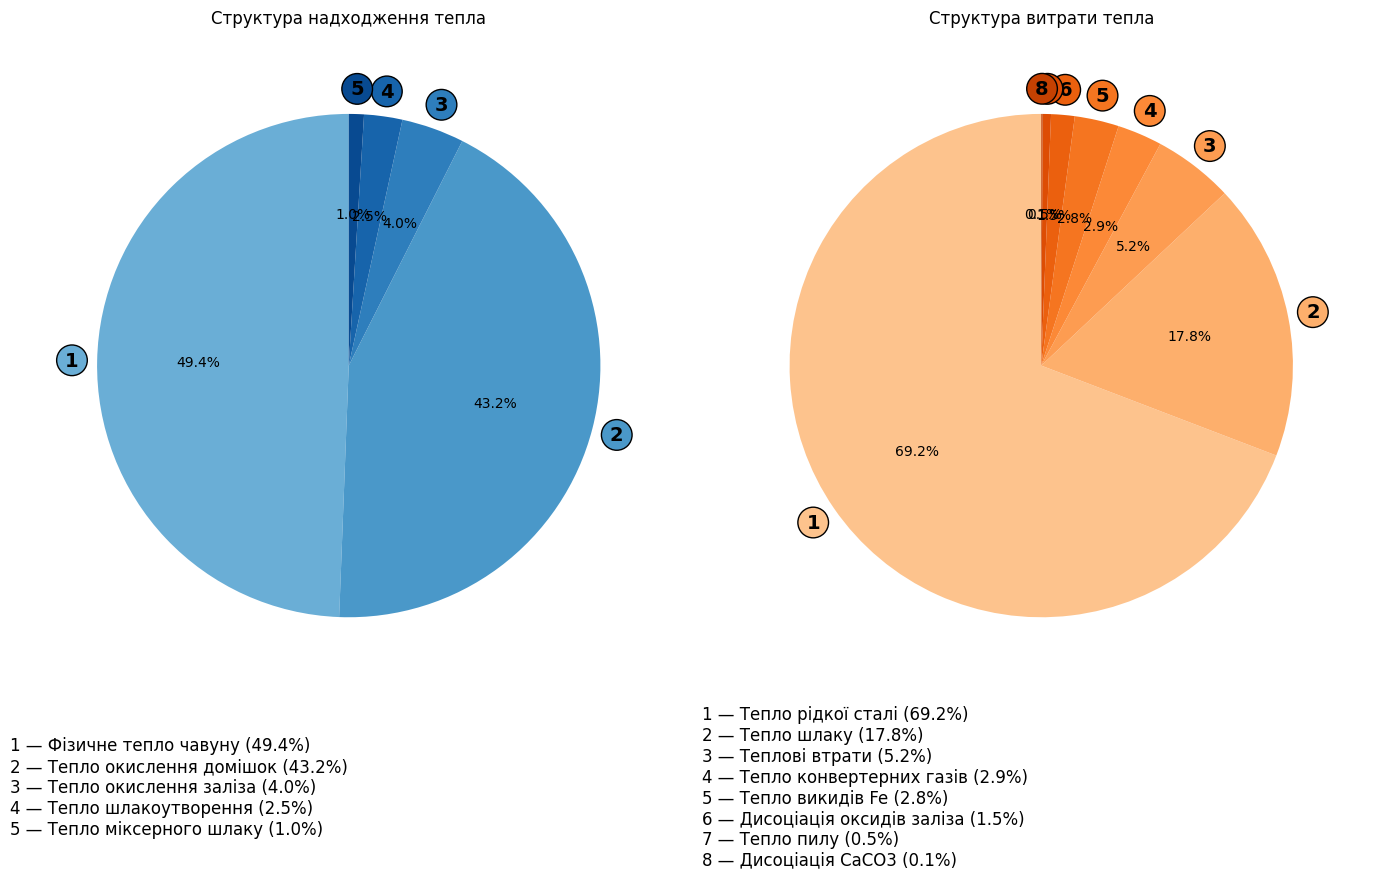

In [49]:
plot_pie_charts(Q_chav_val, Q_msh_val, Q_dom_val, Q_Fe_val, Q_shl_utv_val,
               Q_st_val, Q_shl_val, Q_pil_val, Q_vkv_val, Q_vtr_val,
               Q_g_val, Q_okys_Fe_val, Q_okys_CaCO3_val, Q_nadh, Q_vytr)


## Висновки

Представлений розрахунок теплового балансу киснево-конвертерної плавки дозволяє:

1. Визначити кількість тепла, що надходить і витрачається під час плавки
2. Розрахувати надлишок або дефіцит тепла
3. Визначити необхідну кількість коригуючих добавок для забезпечення заданої температури сталі